## Pre-processing: &thinsp; Cloud fraction - cl 

In [24]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy
import seaborn as sns

import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)

import os
import sys
home = os.path.expanduser("~") + '/Documents'
sys.path.insert(0, '{}/code/phd/functions'.format(home))
from myFuncs import *
%matplotlib inline

# %matplotlib inline
# %matplotlib qt

In [25]:
variable = 'cl'

models_cmip5 = [
    # 'IPSL-CM5A-MR', # 1
    # 'GFDL-CM3',     # 2
    # 'GISS-E2-H',    # 3
    # 'bcc-csm1-1',   # 4
    # 'CNRM-CM5',     # 5
    # 'CCSM4',        # 6
    # 'HadGEM2-AO',   # 7
    # 'BNU-ESM',      # 8
    # 'EC-EARTH',     # 9
    # 'FGOALS-g2',    # 10
    # 'MPI-ESM-MR',   # 11
    # 'CMCC-CM',      # 12
    # 'inmcm4',       # 13
    # 'NorESM1-M',    # 14
    # 'CanESM2',      # 15
    # 'MIROC5',       # 16
    # 'HadGEM2-CC',   # 17
    # 'MRI-CGCM3',    # 18
    # 'CESM1-BGC'     # 19
    ]

models_cmip6 = [     
    'TaiESM1',        # 1
    'BCC-CSM2-MR',    # 2
    'FGOALS-g3',      # 3
    'CNRM-CM6-1',     # 4
    'MIROC6',         # 5
    'MPI-ESM1-2-HR',  # 6
    'NorESM2-MM',     # 7
    'GFDL-CM4',       # 8
    'CanESM5',        # 9
    'CMCC-ESM2',      # 10
    'UKESM1-0-LL',    # 11
    'MRI-ESM2-0',     # 12
    'CESM2',          # 13
    'NESM3'           # 14
    ]

datasets = models_cmip5 + models_cmip6


timescales = [
    # 'daily',
    'monthly'
    ]

experiments =[
    'historical',
    # 'rcp85',
    # 'ssp585'
    ]

resolutions = [
    # 'orig',
    'regridded'
    ]


print('variable:{}, dataset:{}, experiment:{}, resolution:{}'.format(variable, datasets[0], experiments[0], resolutions[0]))
ds = get_dsvariable(variable, datasets[0], experiments[0], home, resolutions[0], timescales[0])
ds

variable:cl, dataset:TaiESM1, experiment:historical, resolution:regridded


<xarray.Dataset>
Dimensions:  (time: 360, lev: 30, lat: 22, lon: 128)
Coordinates:
  * time     (time) object 1970-01-16 12:00:00 ... 1999-12-16 12:00:00
  * lev      (lev) float64 0.9926 0.9763 0.9575 ... 0.01436 0.007595 0.003643
  * lat      (lat) float64 -29.3 -26.51 -23.72 -20.93 ... 20.93 23.72 26.51 29.3
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
Data variables:
    cl       (time, lev, lat, lon) float32 ...
Attributes: (12/50)
    Conventions:               CF-1.7 CMIP-6.2
    activity_id:               CMIP
    branch_method:             Hybrid-restart from year 0671-01-01 of piControl
    branch_time:               0.0
    branch_time_in_child:      0.0
    branch_time_in_parent:     171550.0
    ...                        ...
    title:                     TaiESM1 output prepared for CMIP6
    variable_id:               cl
    variant_label:             r1i1p1f1
    license:                   CMIP6 model data produced by NCC is licensed u...
    cmor_version:              3.5.0
    tracking_id:               hdl:21.14100/826806f2-84df-44ca-b178-6c66e43e7e3d

In [26]:
data = ds['cl']
data

<xarray.DataArray 'cl' (time: 360, lev: 30, lat: 22, lon: 128)>
[30412800 values with dtype=float32]
Coordinates:
  * time     (time) object 1970-01-16 12:00:00 ... 1999-12-16 12:00:00
  * lev      (lev) float64 0.9926 0.9763 0.9575 ... 0.01436 0.007595 0.003643
  * lat      (lat) float64 -29.3 -26.51 -23.72 -20.93 ... 20.93 23.72 26.51 29.3
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
Attributes:
    regrid_method:  conservative

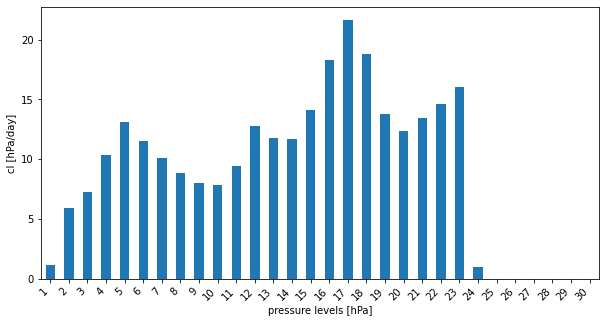

In [27]:
f, ax = plt.subplots(figsize=(10, 5))
aWeights = np.cos(np.deg2rad(ds.lat))
data.isel(time=slice(0,2)).weighted(aWeights).mean(dim=('time','lat','lon')).to_series().plot.bar()
plt.ylabel('cl [{}]'.format('hPa/day'))
plt.xlabel('pressure levels [hPa]')
ax.set_xticklabels((np.arange(1, len(data.lev.values)+1)).astype(int), rotation=45, ha='right')
plt.show()

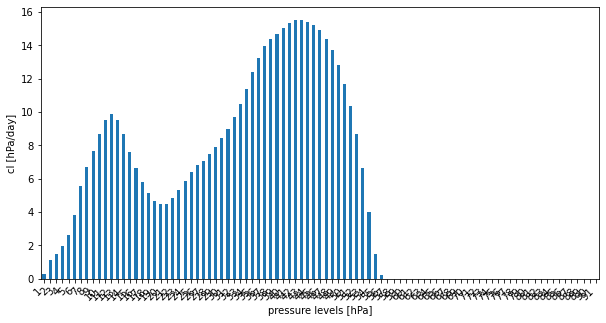

In [28]:
f, ax = plt.subplots(figsize=(10, 5))
aWeights = np.cos(np.deg2rad(ds.lat))
data = get_dsvariable(variable, datasets[3], experiments[0], home, resolutions[0], timescales[0])['cl']
data.isel(time=slice(0,2)).weighted(aWeights).mean(dim=('time','lat','lon')).to_series().plot.bar()
plt.ylabel('cl [{}]'.format('hPa/day'))
plt.xlabel('pressure levels [hPa]')
ax.set_xticklabels((np.arange(1, len(data.lev.values)+1)).astype(int), rotation=45, ha='right')
plt.show()

In [29]:
for dataset in datasets:
    ds = get_dsvariable(variable, dataset, experiments[0], home, resolutions[0])
    print(len(ds.lev))

30
46
26
91
81
95
32
33
49
30
85
80
32
47


### pick out low clouds and high clouds

#### Interpolating to pressure levels
Considering that there is a wide range in vertical levels between models it is logical to first interpolate to pressure levels common to other variables <br>
In CMIP6, there are 19 pressure levels for other variables (on monthly timescales) <br>
Assuming maximum overlap (max cloud fraction taken from pressure range) <br>

In [17]:
p_hybridsigma= get_dsvariable('p_hybridsigma', datasets[0], experiments[0], home, resolutions[0], timescales[0])['p_hybridsigma'] 
p_hybridsigma

<xarray.DataArray 'p_hybridsigma' (lev: 30, time: 360, lat: 22, lon: 128)>
[30412800 values with dtype=float64]
Coordinates:
  * lev      (lev) float64 0.9926 0.9763 0.9575 ... 0.01436 0.007595 0.003643
  * time     (time) object 1970-01-16 12:00:00 ... 1999-12-16 12:00:00
  * lat      (lat) float64 -29.3 -26.51 -23.72 -20.93 ... 20.93 23.72 26.51 29.3
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
Attributes:
    regrid_method:  conservative

In [5]:
def convert_hybrid_to_pressure(cl, p_hybridsigma):
    ''' Takes the maximum of vertical levels between pressure ranges and creates new matrix with the specified pressure levels'''
    p_levs = np.array([150000, 100000.,  92500.,  85000.,  70000.,  60000.,  50000.,  40000.,  30000., 25000.,  20000.,  15000.,  10000.,   7000.,   5000.,   3000.,   2000., 1000., 500., 100.])
    p_levs = xr.DataArray(
        data=p_levs,
        dims = 'plev'
        )
    cl_p = xr.DataArray(
        data = np.zeros(shape = (len(cl.time), len(p_levs)-1, len(cl.lat), len(cl.lon))),
        dims = ['time', 'plev', 'lat', 'lon'],
        coords = {'time':cl.time.data, 'plev': p_levs.data[1:], 'lat': cl.lat.data, 'lon': cl.lon.data}
        )

    for i in range(len(p_levs)-1):
        p_hybridSigma_section = xr.where((p_hybridsigma < p_levs[i]) & (p_hybridsigma >= p_levs[i+1]), 1, 0)
        cl_p[:, i, :, :] = (cl * p_hybridSigma_section).max(dim='lev')
    return cl_p

In [23]:
execute = True
if execute:
    models_cmip5 = [
        # 'IPSL-CM5A-MR', # 1
        # 'GFDL-CM3',     # 2
        # # 'GISS-E2-H',    # 3  no wap data
        # # 'bcc-csm1-1',   # 4  only monthly wap (for rcp)
        # 'CNRM-CM5',     # 5
        # # 'CCSM4',        # 6  only monthly wap
        # # 'HadGEM2-AO',   # 7  only monthly wap
        # 'BNU-ESM',      # 8
        # # 'EC-EARTH',     # 9  no wap data
        # 'FGOALS-g2',    # 10
        # 'MPI-ESM-MR',   # 11
        # 'CMCC-CM',      # 12
        # # 'inmcm4',       # 13 only monthly wap
        # 'NorESM1-M',    # 14
        # 'CanESM2',      # 15
        # 'MIROC5',       # 16
        # # 'HadGEM2-CC',   # 17 no wap data
        # 'MRI-CGCM3',    # 18
        # # 'CESM1-BGC'     # 19 only monthly wap
        ]


    models_cmip6 = [     
        'TaiESM1',        # 1
        # 'BCC-CSM2-MR',    # 2
        # 'FGOALS-g3',      # 3
        # 'CNRM-CM6-1',     # 4
        # 'MIROC6',         # 5
        # 'MPI-ESM1-2-HR',  # 6
        # 'NorESM2-MM',     # 7
        # 'GFDL-CM4',       # 8
        # 'CanESM5',        # 9
        # 'CMCC-ESM2',      # 10
        # 'UKESM1-0-LL',    # 11
        # 'MRI-ESM2-0',     # 12
        # 'CESM2',          # 13
        # 'NESM3'           # 14
        ]


    datasets = models_cmip5 + models_cmip6

    timescales = [
        # 'daily',
        'monthly'
        ]

    resolutions = [
        # 'orig',
        'regridded'
        ]

    experiments =[
        'historical',
        # 'rcp85',
        # 'ssp585'
        ]

    for dataset in datasets:
        for experiment in experiments:
            data = get_dsvariable(variable, dataset, experiment, home, resolutions[0], timescale = timescales[0])['cl']
            p_hybridsigma= get_dsvariable('p_hybridsigma', dataset, experiment, home, resolutions[0], timescales[0])['p_hybridsigma'] 
            
            data = convert_hybrid_to_pressure(data, p_hybridsigma)

            data_low = data.sel(plev = slice(1000e2, 600e2)).max(dim='plev') 
            data_high = data.sel(plev = slice(250e2, 100e2)).max(dim='plev')

            ds_cl_p = xr.Dataset(
                data_vars = {'cl_low': data_low, 
                             'cl_high': data_high},
                attrs = data.attrs
                )

            save_cl = False
            if save_cl:
                if np.isin(models_cmip5, dataset).any():
                    project = 'cmip5'
                elif np.isin(models_cmip6, dataset).any():
                    project = 'cmip6'

                folder_save = home + '/data/' + project + '/' + 'ds_' + project + '_' + resolutions[0] + '/' + dataset 

                fileName = dataset + '_cl_pressure_' + timescales[0] + '_' + experiment + '_' + resolutions[0] +  '.nc'
                save_file(data, folder_save, fileName)

                fileName = dataset + '_clouds_' + timescales[0] + '_' + experiment + '_' + resolutions[0] +  '.nc'
                save_file(ds_cl_p , folder_save, fileName)

In [11]:
data_low

<xarray.DataArray (time: 360, lat: 22, lon: 128)>
array([[[2.60160789e+01, 2.59546833e+01, 2.50448227e+01, ...,
         2.15333977e+01, 2.69654808e+01, 2.97769299e+01],
        [2.93792171e+01, 2.79488163e+01, 2.60710030e+01, ...,
         2.84702473e+01, 3.21305695e+01, 3.27540092e+01],
        [3.20213318e+01, 3.33118286e+01, 3.82510490e+01, ...,
         3.49947701e+01, 3.78269653e+01, 3.50113754e+01],
        ...,
        [1.69417262e+00, 1.30609238e+00, 2.91948485e+00, ...,
         1.48193800e+00, 2.32477212e+00, 2.41215086e+00],
        [4.91101837e+00, 3.82602620e+00, 3.92954493e+00, ...,
         3.71213222e+00, 4.79864597e+00, 5.50111389e+00],
        [7.75899696e+00, 5.86588669e+00, 4.44540167e+00, ...,
         8.27487278e+00, 9.65029526e+00, 9.74998665e+00]],

       [[2.93513908e+01, 2.79368286e+01, 2.35132351e+01, ...,
         3.05749359e+01, 2.55141048e+01, 2.59796944e+01],
        [3.12226505e+01, 2.97079811e+01, 2.96568375e+01, ...,
         3.70904846e+01, 3.14453011e+01, 3.57990990e+01],
        [3.75764618e+01, 3.54898834e+01, 3.74800529e+01, ...,
         3.78643990e+01, 3.51524925e+01, 3.72308350e+01],
...
        [3.11848140e+00, 4.44417048e+00, 1.12706308e+01, ...,
         6.92979956e+00, 6.70890045e+00, 4.79859495e+00],
        [3.05775142e+00, 4.34742928e+00, 8.20684147e+00, ...,
         8.78211594e+00, 9.08362865e+00, 6.16621304e+00],
        [4.94864893e+00, 5.32603502e+00, 6.51032829e+00, ...,
         1.32155752e+01, 1.18403502e+01, 9.26392555e+00]],

       [[1.70148087e+01, 1.71191540e+01, 1.80395260e+01, ...,
         2.07959614e+01, 1.44526272e+01, 1.47860584e+01],
        [1.88236561e+01, 2.03430271e+01, 2.07780838e+01, ...,
         1.88368340e+01, 1.60787754e+01, 1.82959099e+01],
        [2.75944862e+01, 2.84072189e+01, 3.30094070e+01, ...,
         2.13650131e+01, 2.10249290e+01, 2.34731178e+01],
        ...,
        [9.34099720e-04, 7.34612113e-03, 1.62647128e-01, ...,
         2.08170667e-01, 1.69642959e-02, 9.34009068e-03],
        [1.05423786e-01, 2.11555362e-01, 4.36482102e-01, ...,
         9.01432157e-01, 2.14729950e-01, 1.63934052e-01],
        [9.54148471e-01, 1.09215629e+00, 8.06847990e-01, ...,
         3.89885736e+00, 1.42962205e+00, 1.14612508e+00]]])
Coordinates:
  * time     (time) object 1970-01-16 12:00:00 ... 1999-12-16 12:00:00
  * lat      (lat) float64 -29.3 -26.51 -23.72 -20.93 ... 20.93 23.72 26.51 29.3
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2

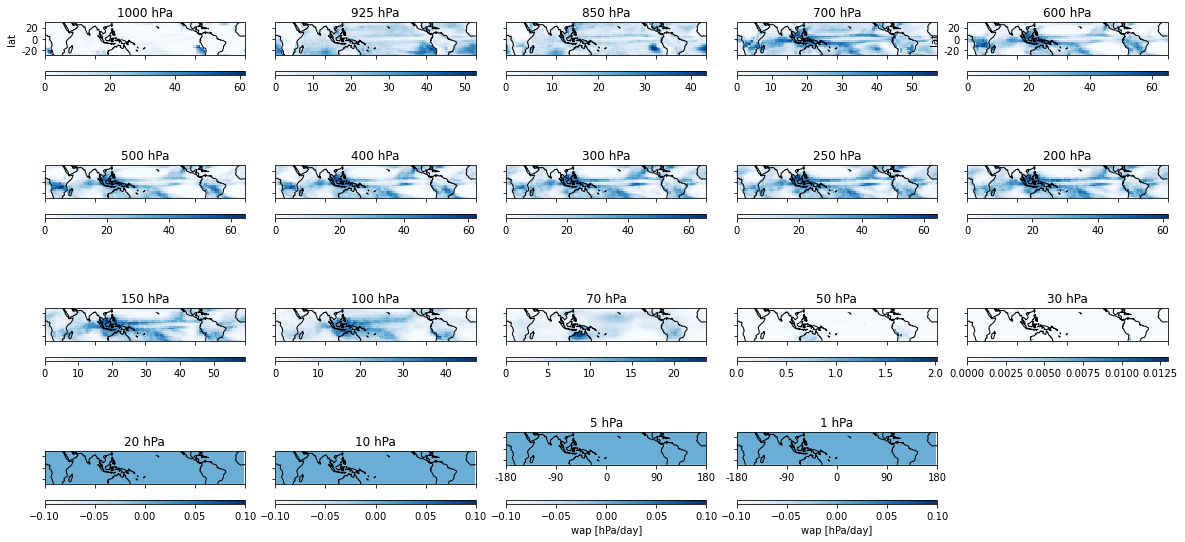

In [14]:
fig= plt.figure(figsize=(20,25))
title = 'Example of {} field (ascent in blue) from dataset: {}'.format(variable, datasets[0])
# fig.suptitle(title, fontsize=18, x= 0.575, y=0.63)

for i, plev in enumerate(data['plev']):
    rows = 6
    cols = 5

    ax= fig.add_subplot(rows,cols,i+1,projection=cartopy.crs.PlateCarree(central_longitude=180))
    plt.subplots_adjust(wspace=0.1, hspace=0.1)

    scene = data.isel(time=0)

    lat = scene.lat
    lon = scene.lon
    lonm,latm = np.meshgrid(lon,lat)

    ax.add_feature(cartopy.feature.COASTLINE)
    ax.set_extent([lon[0], lon[-1], lat[0], lat[-1]], crs=cartopy.crs.PlateCarree())

    vmax = scene.sel(plev=plev).max()
    pcm = ax.pcolormesh(lonm,latm, scene.sel(plev=plev),transform=cartopy.crs.PlateCarree(),zorder=0, cmap='Blues', vmin=0, vmax=vmax)

    ax.set_xticks([-180, -90, 0, 90, 180])
    ax.set_yticks([-20, 0, 20])
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    plt.title(str(int(plev.values/100))+ ' hPa')
    if i>=len(data.plev)-2:
        ax.set_xticklabels([-180, -90, 0, 90, 180])
        plt.colorbar(pcm, ax=ax, orientation='horizontal', pad=0.055, aspect=50, fraction=0.055, label = 'cloud fraction [%]')

    else:
        plt.colorbar(pcm, ax=ax, orientation='horizontal',pad=0.025, aspect=50, fraction=0.055)

    if i== 0 or i==4:
        ylabel = 'lat'
        plt.ylabel(ylabel)
        ax.set_yticklabels([-20, 0, 20])

plt.subplots_adjust(left=0.2, bottom=0.2, right=0.98, top=0.95, wspace=0.15, hspace=-0.775)

#### Using native levels
Suspect won't work as some models have 85 levels and others 30

In [ ]:
execute = False

if execute:
    p_hybridsigma= get_dsvariable('p_hybridsigma', datasets[0], experiments[0], home, resolutions[0], timescales[0])['p_hybridsigma'] 

    data_low = data.where((p_hybridsigma<=1500e2) & (p_hybridsigma>=600e2)).max(dim='lev') 
    data_high = data.where((p_hybridsigma<=250e2) & (p_hybridsigma>=0)).max(dim='lev')

    scene = data_low.isel(time=0)
    title = 'example of {} field from model:{}'.format('low cloud', datasets[0])
    cmap = 'Blues'
    plot_scene(scene, cmap=cmap, title = title)

    scene = data_low.mean(dim='time')
    title = 'example of {} field from model:{}, experiment:{}'.format('low cloud', datasets[0], experiments[0])
    cmap = 'Blues'
    plot_scene(scene, cmap=cmap, title = title)

    timeMean_options = [
        # 'annual',
        # 'seasonal',
        'monthly',
        # 'daily'
        ]

    aWeights = np.cos(np.deg2rad(data_low.lat))
    y= data_low.weighted(aWeights).mean(dim=('lat','lon'))
    title = '{} spatial mean of {} field from model:{}'.format(timeMean_options[0], 'low cloud', datasets[0])
    xlabel = '{} [{} - {}]'.format(timeMean_options[0], str(data.isel(time=0).coords['time'].values)[:10], str(data.isel(time=-1).coords['time'].values)[:10])
    ylabel = 'cloud fraction [{}]'.format('%')

    plot_timeseries(y, title=title, timeMean_option=timeMean_options)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    if timeMean_options[0]=='seasonal':
        plt.legend()

        scene = data_high.isel(time=0)
    title = 'example of {} field from model:{}, experiment:{}'.format('high cloud', datasets[0], experiments[0])
    cmap = 'Blues'
    plot_scene(scene, cmap=cmap, title = title)

    scene = data_high.mean(dim='time')
    title = 'example of {} field from model:{}, experiment:{}'.format('high cloud', datasets[0], experiments[0])
    cmap = 'Blues'
    plot_scene(scene, cmap=cmap, title = title)


    timeMean_options = [
        # 'annual',
        # 'seasonal',
        'monthly',
        # 'daily'
        ]

    aWeights = np.cos(np.deg2rad(data_high.lat))
    y= data_high.weighted(aWeights).mean(dim=('lat','lon'))
    title = '{} spatial mean of {} field from model:{}'.format(timeMean_options[0], 'high cloud', datasets[0])
    xlabel = '{} [{} - {}]'.format(timeMean_options[0], str(data.isel(time=0).coords['time'].values)[:10], str(data.isel(time=-1).coords['time'].values)[:10])
    ylabel = 'Cloud fraction [{}]'.format('%')


    plot_timeseries(y, title=title, timeMean_option=timeMean_options)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    if timeMean_options[0]=='seasonal':
        plt.legend()